In [51]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [159]:
df= pd.read_csv("superstore.csv", encoding='latin-1',parse_dates=['order_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   row_id          51290 non-null  int64         
 1   order_id        51290 non-null  object        
 2   order_date      51290 non-null  datetime64[ns]
 3   ship_date       51290 non-null  object        
 4   ship_mode       51290 non-null  object        
 5   customer_id     51290 non-null  object        
 6   customer_ name  51290 non-null  object        
 7   segment         51290 non-null  object        
 8   city            51290 non-null  object        
 9   state           51290 non-null  object        
 10  country         51290 non-null  object        
 11  postal code     9994 non-null   float64       
 12  market          51290 non-null  object        
 13  region          51290 non-null  object        
 14  product_id      51290 non-null  object        
 15  ca

In [53]:
df.shape

(51290, 24)

This dataset shows the order done in a several superstores (around the world)

Interesting columns:
- Ship Mode: 
- Segment of the Costumer
- Category of the Order ex. Office Supplies
- Subcategory of the Order ex. Storage
- Sales, Quantity, Discount, Profit, Shipping_cost	
- Order Priority 

In [54]:
# % Customer by segment



df.groupby('segment').describe()[['sales','profit']]


sales                                                           \
               count        mean         std    min      25%     50%      75%   
segment                                                                         
Consumer     26518.0  245.416299  477.132518  0.444  30.6900  85.005  250.992   
Corporate    15429.0  247.890176  486.043062  0.556  31.0800  85.440  252.840   
Home Office   9343.0  247.228403  518.439396  0.990  30.3795  84.600  248.760   

                        profit                                                \
                  max    count       mean         std       min  25%     50%   
segment                                                                        
Consumer     13999.96  26518.0  28.254008  174.006045 -6599.978  0.0  9.1800   
Corporate    17499.95  15429.0  28.596042  177.156362 -4088.376  0.0  9.3152   
Home Office  22638.48   9343.0  29.648847  170.577590 -3399.980  0.0  9.3200   

                                 
                 75%        max  
segment                          
Consumer     36.6525  6719.9808  
Corporate    36.9450  8399.9760  
Home Office  37.0800  3919.9888

In [55]:
#  Segment Distribution

y=df.groupby('segment')['order_id'].count()
y

segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: order_id, dtype: int64

In [56]:
df.groupby('segment').count()['order_id']

segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: order_id, dtype: int64

In [57]:
z=y.map(lambda x: x/y.sum())

In [58]:
poppo=pd.DataFrame({"count": y, "percentage": z})
poppo

,count,percentage
segment,,
Consumer,26518,0.517021
Corporate,15429,0.300819
Home Office,9343,0.182160


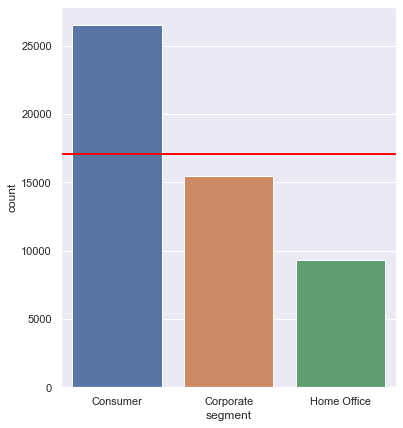

In [59]:
f, ax=plt.subplots(figsize=(6,7))

sns.barplot(data=poppo.reset_index(), y='count', x='segment')
ax.axhline(poppo['count'].mean(), color='red', linewidth=2)

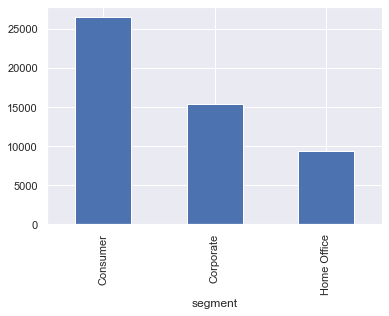

In [60]:
poppo["count"].plot.bar()

In [110]:
poppo["percentage"].plot.bar(color=red)


NameError: name 'red' is not defined

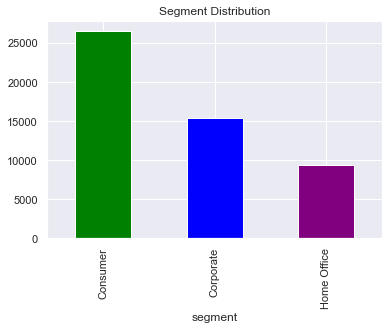

In [62]:
y.plot.bar(color=['green', 'blue', 'purple'])
plt.title('Segment Distribution')
plt.show()



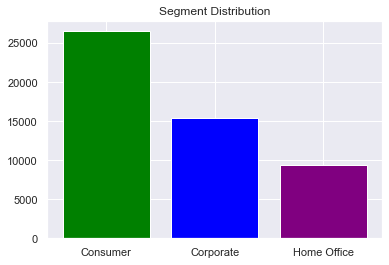

In [63]:
plt.bar(y.index, y.values, color=['green', 'blue', 'purple'])
plt.title('Segment Distribution')
plt.show()



In [64]:
df.groupby('segment').count()['order_id'].map(lambda x: x/y.sum())

segment
Consumer       0.517021
Corporate      0.300819
Home Office    0.182160
Name: order_id, dtype: float64

In [65]:
y.map(lambda x: x/y.sum())

segment
Consumer       0.517021
Corporate      0.300819
Home Office    0.182160
Name: order_id, dtype: float64

In [66]:
# Create a new column Profit rate

df['profit_rate']= (df['profit']/df['sales'])*100


In [93]:
df['price']= (df['sales']/df['quantity'])

In [94]:
df

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_ name,segment,city,state,...,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,profit_rate,price
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium,25.995591,204.150
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium,29.938687,40.122
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High,44.827586,16.530
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High,-58.074223,14.955
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium,33.227765,22.734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium,32.500000,6.952
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium,10.526316,3.990
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium,46.818182,8.800
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium,7.865169,7.120


In [143]:

sns.barplot(data=df, x='category', y='profit',color=('black', 'red', 'green', 'blue', 'cyan'))



ValueError: Invalid RGBA argument: ('black', 'red', 'green', 'blue', 'cyan')

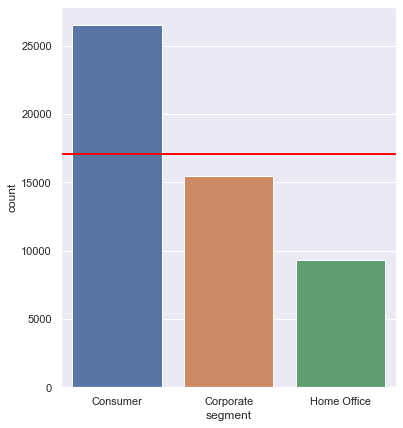

In [69]:
f, ax=plt.subplots(figsize=(6,7))

sns.barplot(data=poppo.reset_index(), y='count', x='segment')
ax.axhline(poppo['count'].mean(), color='red', linewidth=2)

In [70]:
category= df.groupby('segment')['category'].nunique()
category

segment
Consumer       3
Corporate      3
Home Office    3
Name: category, dtype: int64

In [71]:
df

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_ name,segment,city,state,...,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,profit_rate
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium,25.995591
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium,29.938687
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High,44.827586
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High,-58.074223
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium,33.227765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium,32.500000
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium,10.526316
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium,46.818182
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium,7.865169


No handles with labels found to put in legend.


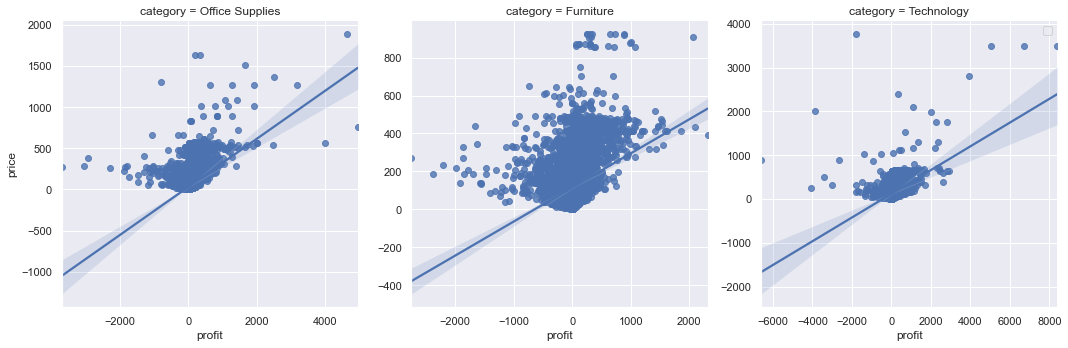

In [95]:
sns.lmplot(data=df, x="profit", y="price", col="category", sharex=False, sharey=False, col_wrap=3)
plt.legend()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_ name,segment,city,state,...,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,profit_rate
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium,25.995591
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium,29.938687
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High,44.827586
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High,-58.074223
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium,33.227765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium,32.500000
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium,10.526316
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium,46.818182
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium,7.865169


No handles with labels found to put in legend.


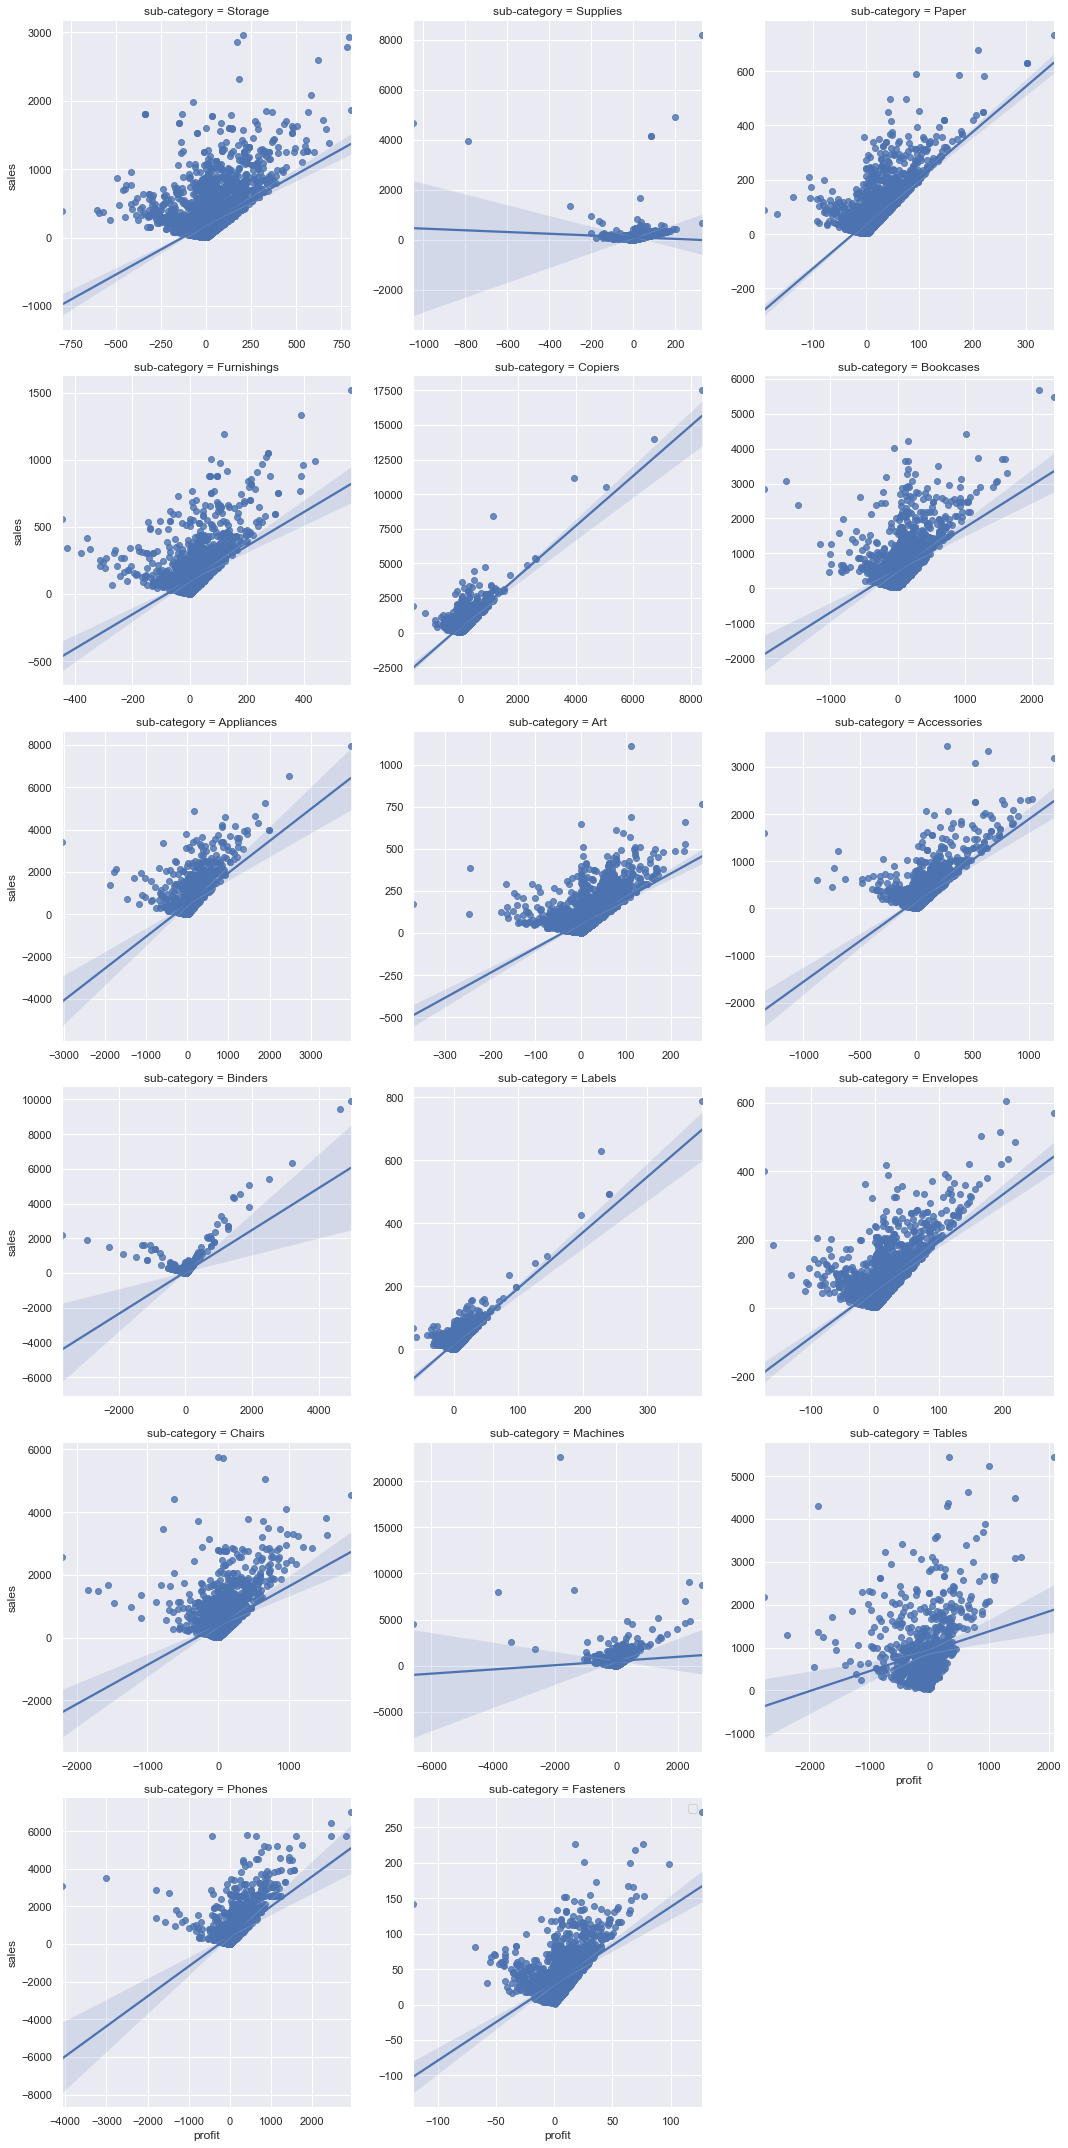

In [ ]:
sns.lmplot(data=df, x="profit", y="sales", col="country",hue='category', sharex=False, sharey=False, col_wrap=3)
plt.legend()

In [102]:
df[['profit','discount']].corr()

,profit,discount
profit,1.00000,-0.31649
discount,-0.31649,1.00000


<function matplotlib.pyplot.show(*args, **kw)>

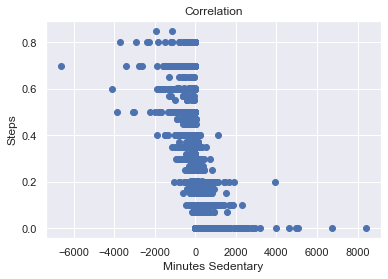

In [103]:
plt.scatter(df['profit'], df.discount)
plt.title("Correlation")
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.show

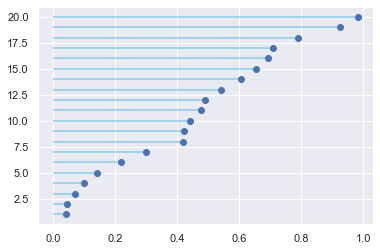

In [120]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
# Create a dataframe
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })

# Reorder it following the values:
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)
 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], my_range, "o")


In [160]:
m=df.groupby('sub-category')['profit'].mean()
m.sort_values()



sub-category
Tables         -74.429023
Fasteners        4.762572
Labels           5.759982
Supplies         9.312686
Binders         11.776633
Art             11.868505
Envelopes       12.156516
Furnishings     14.816223
Paper           16.734789
Storage         21.439314
Machines        39.614989
Chairs          40.884178
Accessories     42.154896
Phones          64.556749
Bookcases       67.160688
Appliances      80.729681
Copiers        116.314687
Name: profit, dtype: float64

In [130]:
x=pd.DataFrame(m)
ti= pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })

array([[ 42.15489633],
       [ 80.72968057],
       [ 11.8685052 ],
       [ 11.77663296],
       [ 67.1606883 ],
       [ 40.88417807],
       [116.31468654],
       [ 12.15651593],
       [  4.76257194],
       [ 14.81622256],
       [  5.75998158],
       [ 39.61498856],
       [ 16.73478878],
       [ 64.55674882],
       [ 21.43931405],
       [  9.31268581],
       [-74.42902288]])

AttributeError: 'numpy.float64' object has no attribute 'set_color'

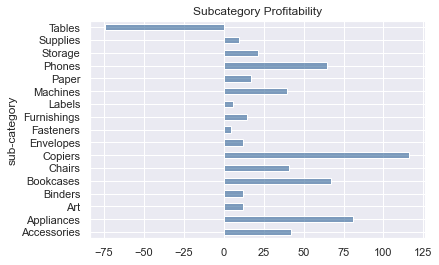

In [156]:
m.plot.barh(color=(0.2, 0.4, 0.6, 0.6))
plt.title('Subcategory Profitability')
plt.show()